In [1]:
!pip install -q kaggle

In [7]:
from google.colab import files
files.upload()

Saving mobile_train.csv to mobile_train.csv
Saving mobile_test.csv to mobile_test.csv


{'mobile_train.csv': b'battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range\n842,0,2.2,0,1,0,7,0.6,188,2,2,20,756,2549,9,7,19,0,0,1,1\n1021,1,0.5,1,0,1,53,0.7,136,3,6,905,1988,2631,17,3,7,1,1,0,2\n563,1,0.5,1,2,1,41,0.9,145,5,6,1263,1716,2603,11,2,9,1,1,0,2\n615,1,2.5,0,0,0,10,0.8,131,6,9,1216,1786,2769,16,8,11,1,0,0,2\n1821,1,1.2,0,13,1,44,0.6,141,2,14,1208,1212,1411,8,2,15,1,1,0,1\n1859,0,0.5,1,3,0,22,0.7,164,1,7,1004,1654,1067,17,1,10,1,0,0,1\n1821,0,1.7,0,4,1,10,0.8,139,8,10,381,1018,3220,13,8,18,1,0,1,3\n1954,0,0.5,1,0,0,24,0.8,187,4,0,512,1149,700,16,3,5,1,1,1,0\n1445,1,0.5,0,0,0,53,0.7,174,7,14,386,836,1099,17,1,20,1,0,0,0\n509,1,0.6,1,2,1,9,0.1,93,5,15,1137,1224,513,19,10,12,1,0,0,0\n769,1,2.9,1,0,0,9,0.1,182,5,1,248,874,3946,5,2,7,0,0,0,3\n1520,1,2.2,0,5,1,33,0.5,177,8,18,151,1005,3826,14,9,13,1,1,1,3\n1815,0,2.8,0,2,0,33,0.6,159,4,17,607,748,1482,18,0,2,1,0,0,1\

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [10]:
pwd

'/content'

In [2]:
dataset=pd.read_csv('/content/mobile_train.csv')


In [3]:
dataset.head()


,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1


In [4]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  2000 non-null   int64  
 1   blue           2000 non-null   int64  
 2   clock_speed    2000 non-null   float64
 3   dual_sim       2000 non-null   int64  
 4   fc             2000 non-null   int64  
 5   four_g         2000 non-null   int64  
 6   int_memory     2000 non-null   int64  
 7   m_dep          2000 non-null   float64
 8   mobile_wt      2000 non-null   int64  
 9   n_cores        2000 non-null   int64  
 10  pc             2000 non-null   int64  
 11  px_height      2000 non-null   int64  
 12  px_width       2000 non-null   int64  
 13  ram            2000 non-null   int64  
 14  sc_h           2000 non-null   int64  
 15  sc_w           2000 non-null   int64  
 16  talk_time      2000 non-null   int64  
 17  three_g        2000 non-null   int64  
 18  touch_sc

In [6]:
X=dataset.drop('price_range',axis=1)
y=dataset['price_range']


In [7]:
X.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi
0,842,0,2.2,0,1,0,7,0.6,188,2,2,20,756,2549,9,7,19,0,0,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,6,905,1988,2631,17,3,7,1,1,0
2,563,1,0.5,1,2,1,41,0.9,145,5,6,1263,1716,2603,11,2,9,1,1,0
3,615,1,2.5,0,0,0,10,0.8,131,6,9,1216,1786,2769,16,8,11,1,0,0
4,1821,1,1.2,0,13,1,44,0.6,141,2,14,1208,1212,1411,8,2,15,1,1,0


In [8]:
y.head()

0    1
1    2
2    2
3    2
4    1
Name: price_range, dtype: int64

In [9]:
dataset.describe()


,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
count,2000.000000,2000.0000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,...,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,1238.518500,0.4950,1.522250,0.509500,4.309500,0.521500,32.046500,0.501750,140.249000,4.520500,...,645.108000,1251.515500,2124.213000,12.306500,5.767000,11.011000,0.761500,0.503000,0.507000,1.500000
std,439.418206,0.5001,0.816004,0.500035,4.341444,0.499662,18.145715,0.288416,35.399655,2.287837,...,443.780811,432.199447,1084.732044,4.213245,4.356398,5.463955,0.426273,0.500116,0.500076,1.118314
min,501.000000,0.0000,0.500000,0.000000,0.000000,0.000000,2.000000,0.100000,80.000000,1.000000,...,0.000000,500.000000,256.000000,5.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000
25%,851.750000,0.0000,0.700000,0.000000,1.000000,0.000000,16.000000,0.200000,109.000000,3.000000,...,282.750000,874.750000,1207.500000,9.000000,2.000000,6.000000,1.000000,0.000000,0.000000,0.750000
50%,1226.000000,0.0000,1.500000,1.000000,3.000000,1.000000,32.000000,0.500000,141.000000,4.000000,...,564.000000,1247.000000,2146.500000,12.000000,5.000000,11.000000,1.000000,1.000000,1.000000,1.500000
75%,1615.250000,1.0000,2.200000,1.000000,7.000000,1.000000,48.000000,0.800000,170.000000,7.000000,...,947.250000,1633.000000,3064.500000,16.000000,9.000000,16.000000,1.000000,1.000000,1.000000,2.250000
max,1998.000000,1.0000,3.000000,1.000000,19.000000,1.000000,64.000000,1.000000,200.000000,8.000000,...,1960.000000,1998.000000,3998.000000,19.000000,18.000000,20.000000,1.000000,1.000000,1.000000,3.000000


In [10]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=32)


# Linear Regression

In [11]:
from sklearn.linear_model import LinearRegression
lm = LinearRegression()

In [12]:
lm.fit(X_train,y_train)


LinearRegression()

In [30]:
lm.score(X_test,y_test)


0.9171531574068481

In [31]:
lr_score=lm.score(X_test,y_test)


# KNN Classification

In [14]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=10)
knn.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=10)

In [15]:
knn.score(X_test,y_test)


0.935

In [32]:
knn_score= knn.score(X_test,y_test)


In [16]:
error_rate = []
for i in range(1,20):
    
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    pred_i = knn.predict(X_test)
    error_rate.append(np.mean(pred_i != y_test))

Text(0, 0.5, 'Error Rate')

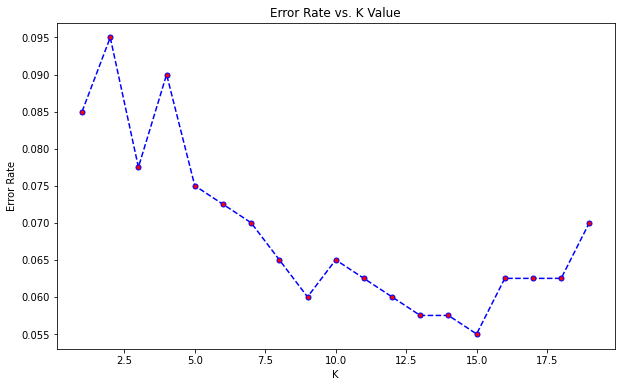

In [17]:
plt.figure(figsize=(10,6))
plt.plot(range(1,20),error_rate,color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=5)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')

# Logistic Regression

In [19]:
from sklearn.linear_model import LogisticRegression
logmodel = LogisticRegression()
logmodel.fit(X_train,y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


LogisticRegression()

In [20]:
logmodel.score(X_test,y_test)


0.62

In [33]:
logreg_score= logmodel.score(X_test,y_test)


# Random Forest

In [21]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators=200)
rfc.fit(X_train, y_train)

RandomForestClassifier(n_estimators=200)

In [22]:
rfc.score(X_test,y_test)


0.8925

In [34]:
rf_score = rfc.score(X_test,y_test)


# Decision Tree

In [23]:
from sklearn.tree import DecisionTreeClassifier
dtree = DecisionTreeClassifier()
dtree.fit(X_train,y_train)

DecisionTreeClassifier()

In [24]:
dtree.score(X_test,y_test)


0.8675

In [35]:
dtree_score= dtree.score(X_test,y_test)


In [43]:
acc_v = [ lr_score, knn_score, logreg_score, rf_score, dtree_score]

In [44]:
acc_n = ['lin reg', 'knn', 'logistic reg', 'random for', 'dec tree']

In [41]:
from sklearn.metrics import plot_confusion_matrix


Text(0, 0.5, 'Accuracy')

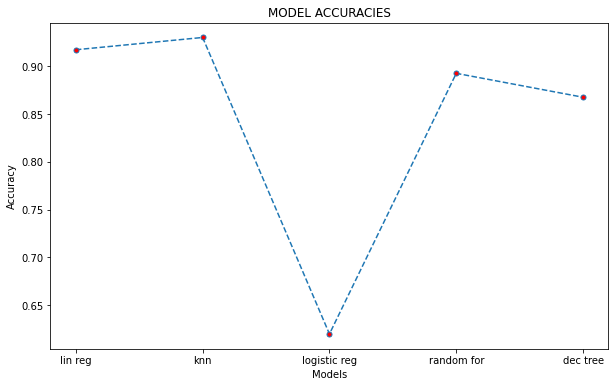

In [52]:
plt.figure(figsize=(10,6))

plt.plot(acc_n, acc_v, linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=5)
plt.title('MODEL ACCURACIES')
plt.xlabel('Models')
plt.ylabel('Accuracy')

# RESULTS

## LINEAR REGRESSION

In [61]:
y_pred=lm.predict(X_test)
import numpy as np

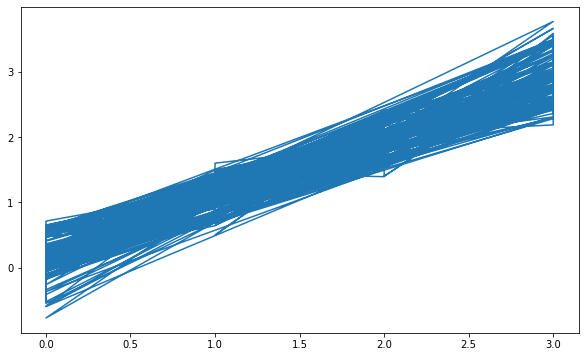

In [60]:
plt.figure(figsize=(10,6))
plt.plot(y_test,y_pred)


In [62]:
matrix = np.corrcoef(y_test,y_pred)
print(matrix)

[[1.         0.95806439]
 [0.95806439 1.        ]]


## KNN

In [63]:
from sklearn.metrics import classification_report,confusion_matrix
pred = knn.predict(X_test)
print(classification_report(y_test,pred))


              precision    recall  f1-score   support

           0       0.98      0.97      0.98       106
           1       0.92      0.90      0.91        93
           2       0.87      0.92      0.89       106
           3       0.95      0.93      0.94        95

    accuracy                           0.93       400
   macro avg       0.93      0.93      0.93       400
weighted avg       0.93      0.93      0.93       400



In [64]:
matrix=confusion_matrix(y_test,pred)
print(matrix)

[[103   3   0   0]
 [  2  84   7   0]
 [  0   4  97   5]
 [  0   0   7  88]]


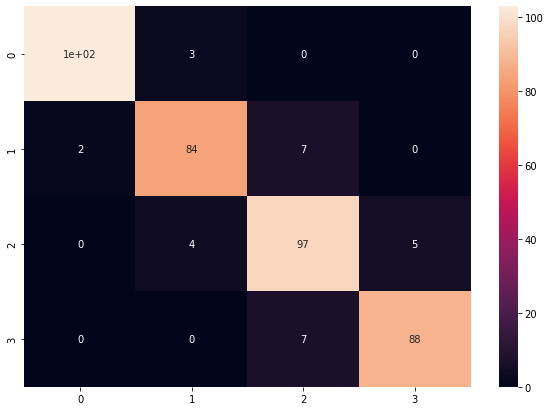

In [65]:
plt.figure(figsize = (10,7))
sns.heatmap(matrix,annot=True)

# MODEL

In [73]:
X_train

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi
567,1269,1,1.3,0,14,0,52,0.8,118,2,15,1597,1920,665,18,5,5,0,0,0
1121,1545,0,1.3,1,15,1,35,0.1,173,5,20,115,1352,3197,14,9,6,1,0,1
1848,1792,1,1.0,0,3,1,62,0.3,170,7,8,1626,1913,2563,18,14,15,1,0,1
451,972,1,1.7,0,0,1,54,0.7,107,3,4,681,1050,1900,16,8,19,1,0,1
598,1137,0,2.2,0,6,1,3,0.9,173,5,7,1250,1285,316,15,14,17,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
892,912,0,0.5,1,0,0,58,0.3,107,5,1,165,1723,3573,17,3,20,1,1,0
1334,1039,0,0.5,1,8,0,47,0.2,130,8,9,384,1878,1742,18,12,15,1,0,0
1925,1830,1,0.5,0,5,0,14,0.8,160,6,6,773,1353,1905,16,3,19,1,1,1
1579,1715,0,2.6,1,9,1,15,0.6,120,6,20,114,1849,1249,16,2,4,1,1,0


In [74]:
predicted_price=knn.predict(X_test)


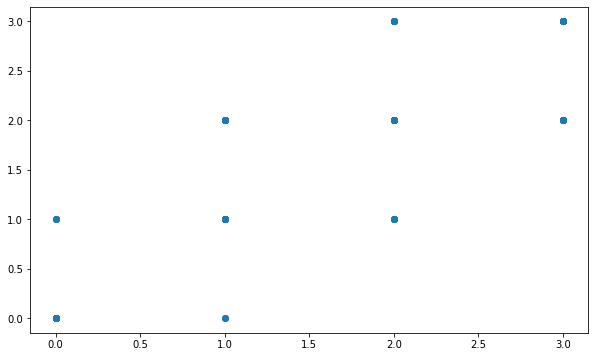

In [77]:
plt.figure(figsize=(10,6))
plt.scatter(y_test,predicted_price)

In [93]:
X_train.head(1)

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi
567,1269,1,1.3,0,14,0,52,0.8,118,2,15,1597,1920,665,18,5,5,0,0,0


In [108]:
arr=np.array([1300, 1, 1.4, 1, 14, 1, 52, 0.8, 111, 2, 15, 1597, 1911, 666, 18, 5, 5, 1, 1, 1])
knn.predict(arr.reshape(1,-1))


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  "X does not have valid feature names, but"


array([1])

In [106]:
prediction

array([1])

## PICKLE

In [107]:
import pickle

In [110]:
pickle.dump(knn, open('knn_model.pkl', 'wb'))

In [111]:
pickled_model= pickle.load(open('knn_model.pkl','rb'))

In [112]:
arr2=np.array([1300, 1, 1.4, 1, 14, 1, 52, 0.8, 120, 2, 15, 1600, 1911, 666, 18, 5, 5, 1, 1, 1])
pickled_model.predict(arr2.reshape(1,-1))

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  "X does not have valid feature names, but"


array([1])

In [115]:
!python --version

Python 3.7.13
